# Classification

Link dataset : `https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention?fbclid=IwAR0MASZzrhw1ZiCbGlpXJEHx3cyZ1SQXN18PJfKG1Q_eqLI4t8dsEcQklaI`

# Load package

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay

# Reading data

In [15]:
data = pd.read_csv('student.csv')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [16]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

# Details

| Tên cột                              | Mô tả                                                                                                          |
|--------------------------------------|----------------------------------------------------------------------------------------------------------------|
| Marital status                   | Tình trạng hôn nhân của sinh viên. (Categorical)                                                                |
| Application mode                  | Phương thức đăng ký được sử dụng bởi sinh viên. (Categorical)                                                   |
| Application order                       | Thứ tự mà sinh viên đăng ký. (Numerical)                                                                       |
| Course                             | Khóa học mà sinh viên đăng ký. (Categorical)                                                                    |
| Daytime/evening attendance       | Liên quan đến việc sinh viên học vào ban ngày hay ban đêm. (Categorical)                                        |
| Previous qualification           | Trình độ học vấn mà sinh viên đã đạt được trước khi nhập học đại học. (Categorical)                            |
| Nationality                            | Quốc tịch của sinh viên. (Categorical)                                                                          |
| Mother's quafilication             | Trình độ học vấn của mẹ của sinh viên. (Categorical)                                                            |
| Father's quafilication             | Trình độ học vấn của cha của sinh viên. (Categorical)                                                            |
| Mother's occupation                   | Nghề nghiệp của mẹ của sinh viên. (Categorical)                                                                  |
| Father's occupation                   | Nghề nghiệp của cha của sinh viên. (Categorical)                                                                  |
| Displaced                        | Liên quan đến việc sinh viên có phải là người di tản hay không. (Categorical)                                    |
| Educational special needs            | Liên quan đến việc sinh viên có bất kỳ nhu cầu giáo dục đặc biệt nào hay không. (Categorical)                   |
| Debtor                                    | Liên quan đến việc sinh viên có nợ hay không. (Categorical)                                                     |
| Tuition fees up to date                  | Liên quan đến việc học phí của sinh viên có được cập nhật hay không. (Categorical)                              |
| Gender                            | Giới tính của sinh viên. (Categorical)                                                                          |
| Scholarship holder                   | Liên quan đến việc sinh viên có đang nhận học bổng hay không. (Categorical)                                      |
| Age at enrollment                    | Tuổi của sinh viên khi nhập học. (Numerical)                                                                    |
| International                   | Liên quan đến việc sinh viên có phải là sinh viên quốc tế hay không. (Categorical)                             |
| Curricular units 1st sem (credited) | Số đơn vị học phần được ghi nhận. (Numerical)   |
| Curricular units 1st sem (enrolled) | Số đơn vị học phần được đăng ký. (Numerical)    |
| Curricular units 1st sem (evaluated) | Số đơn vị học phần được đánh giá. (Numerical)  |
| Curricular units 1st sem (approved) | Số đơn vị học phần được hoàn thành. (Numerical) |

In [17]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [19]:
data.shape

(4424, 35)

# Data processing

In [20]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

it seem like that there are no NaN 

In [21]:
data.duplicated().sum()

0

and even that doesnt have duplicated data

# EDA

Group of `Target` who : Graduate , Dropout , Enrolled

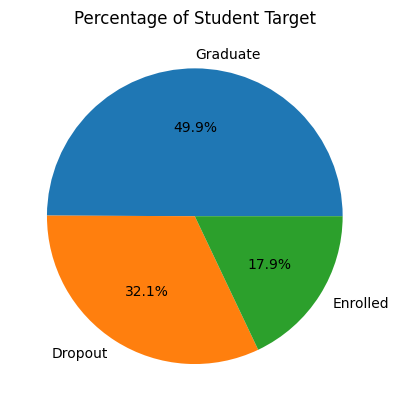

In [22]:
student_target = data['Target'].value_counts()

plt.pie(student_target, labels=student_target.index, autopct='%1.1f%%')
plt.title('Percentage of Student Target')
plt.show()
#Proportion of Student Target

Approximately : </br>
+ 50% of students in the data have graduated. </br>
+ 32.1%                            dropout      </br>
+ 17,9%                            enrolled

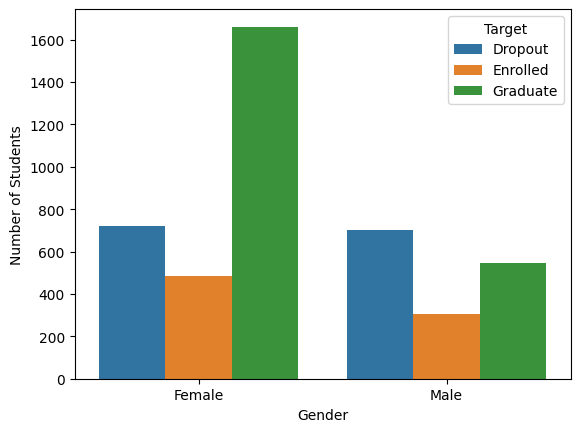

In [23]:
sns.countplot(data=data, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()
#Number of student target by Genders

a higher number of graduates are female. However, females also have the highest number of dropouts, although the difference compared to males is small.

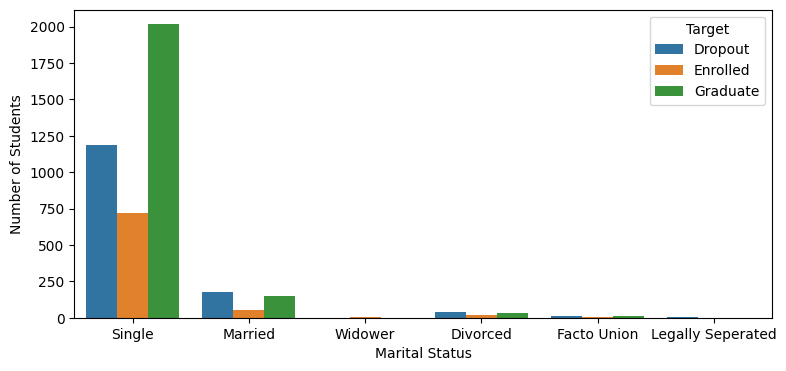

In [24]:
plt.figure(figsize=(9,4))

sns.countplot(data=data, x='Marital status', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1,2,3,4,5], labels=['Single','Married','Widower','Divorced','Facto Union','Legally Seperated'])
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.show()
#Number of student target by Marital Status

Regarding marital status, the majority of both graduates and dropouts are single </br>


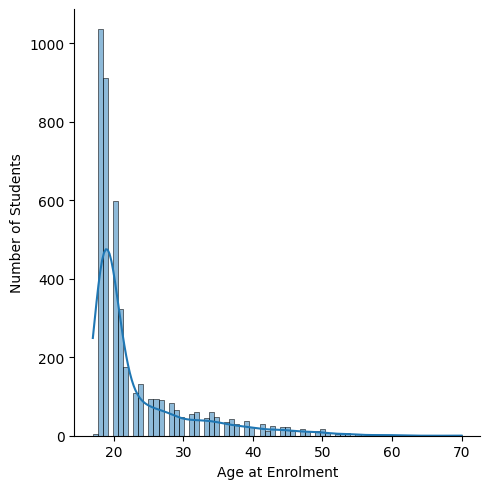

In [25]:
sns.displot(data=data, x='Age at enrollment', kde=True)
data['Age at enrollment'].describe()

plt.xlabel('Age at Enrolment')
plt.ylabel('Number of Students')
plt.show()
#Number of student enrolled by Ages


The distribution of age at enrolment is positively skewed </br>
with the most frequent age range falling between 19 to 25 years old. And at max : 19

[Text(0.5, 1.0, 'Age Dropout'), Text(0.5, 0, 'Age'), Text(0, 0.5, 'Percen')]

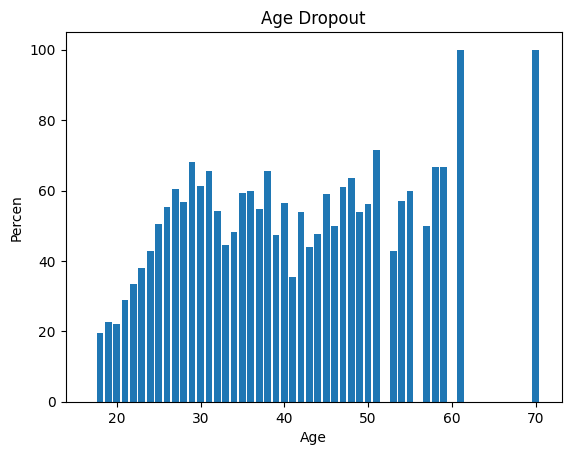

In [41]:
# lấy những bản ghi có giá trị "Dropout" trong cột "Target"
# nhóm chúng theo từng độ tuổi bằng hàm "groupby" và đếm số lượng bản ghi -> lưu vào list: `dropout_by_age`
dropout_by_age = data.loc[data.Target == 'Dropout'].groupby('Age at enrollment').Target.agg(['count']).to_dict()
# nhóm các bản ghi theo từng độ tuổi và đếm số lượng bản ghi -> `total_by_age`
total_by_age = data.groupby('Age at enrollment').Target.agg(['count']).to_dict()

# Kiểm tra độ tuổi nào không có trong dictionary "dropout_by_age", 
# nếu không có thì thêm độ tuổi đó vào với giá trị bằng 0.
for age in list(total_by_age['count'].keys()):
    if age not in list(dropout_by_age['count'].keys()):
        dropout_by_age['count'][age] = 0

# Sắp xếp dictionary "dropout_by_age" theo độ tuổi và lưu trữ kết quả vào dictionary temp
temp = list(dropout_by_age['count'].keys())
temp.sort()
temp = {key: dropout_by_age['count'][key] for key in temp}
# Tính tỷ lệ bỏ học theo độ tuổi 
# bằng cách lấy số lượng bỏ học ở từng độ tuổi trong dictionary "temp" chia cho tổng số lượng ở từng độ tuổi 
# trong dictionary "total_by_age" và nhân với 100. 
# Kết quả được lưu trữ trong list "dropout_rate_by_age".
dropout_rate_by_age = [list(temp.values())[i] / list(total_by_age['count'].values())[i] * 100 for i in range(len(list(total_by_age['count'].keys())))]

fig, ax = plt.subplots()
# Vẽ biểu đồ cột thể hiện kết quả với trục x là độ tuổi và trục y là tỷ lệ bỏ học được tính toán ở bước trước.
ax.bar(list(total_by_age['count'].keys()), dropout_rate_by_age)
ax.set(title = "Age Dropout", xlabel="Age", ylabel="Percen")
#fig.show()
#Dropout percentage by Ages

while they older, they dropout

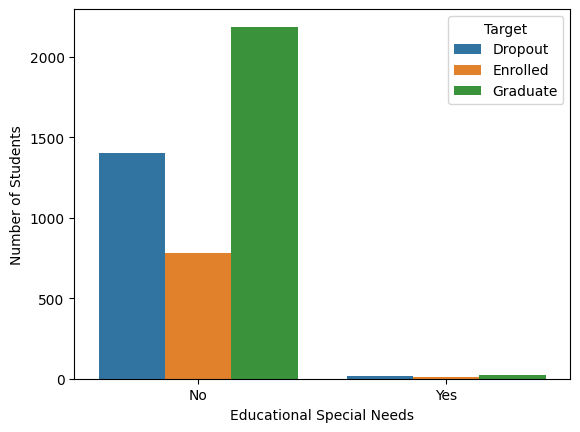

In [27]:
sns.countplot(data=data, x='Educational special needs', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Educational Special Needs')
plt.ylabel('Number of Students')
plt.show()
#Number of student with Educational Special Needs (learning difficulties or disabilities that make it harder
#for children to learn than most children of the same age)

Almost are No needs in educational Special

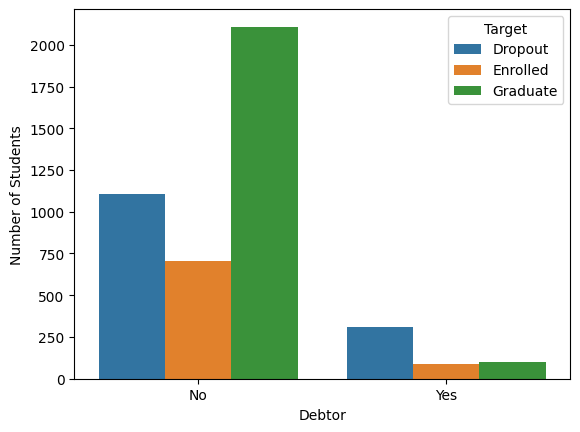

In [28]:
sns.countplot(data=data, x="Debtor", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Debtor')
plt.ylabel('Number of Students')
plt.show()
#Statistics/comparison in Number of student Target by Debt

Also almost no Debtor

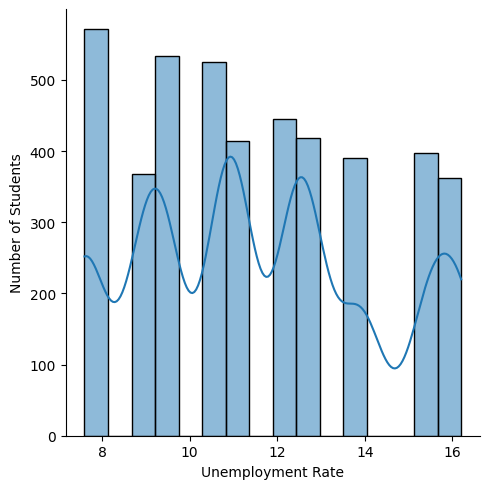

In [29]:
sns.displot(data=data, x="Unemployment rate", kde=True)
data['Unemployment rate'].describe()

plt.xlabel('Unemployment Rate')
plt.ylabel('Number of Students')
plt.show()

#Rate of Unemployment student

The majority of the data points in the unemployment rate distribution fall within the range of 9 to 13.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28444\1040971894.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm')


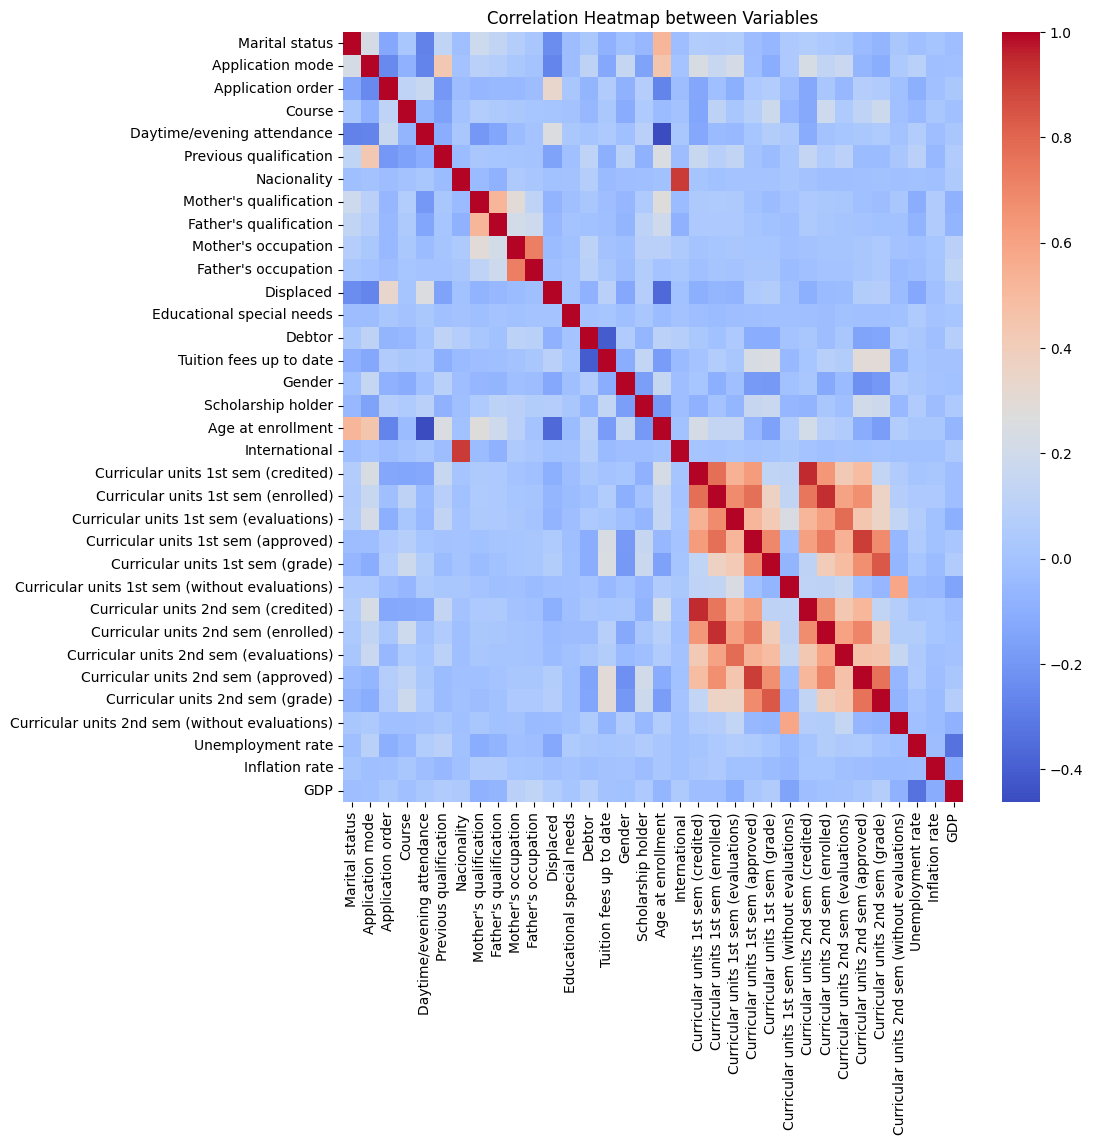

In [30]:
plt.figure(figsize=(10,10))

sns.heatmap(data.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap between Variables')
plt.show()

#Correlation heatmap between variables

It have a high correlation between `International` and `Nacionality`. So we will remove it

In [31]:
data = data.drop(['International','Nacionality'],axis=1)

# Modeling

In [32]:
student_data = data.drop(data[data['Target']=='Enrolled'].index)
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,13,10,6,10,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,3,4,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,22,27,10,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,23,27,6,4,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,22,28,10,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Encode feature categorical

In [33]:
encoder = LabelEncoder()

In [34]:
student_data['Target'] = encoder.fit_transform(student_data['Target'])

Get X and Y

In [35]:
X = student_data.drop(columns=['Target'], axis=1)
Y = student_data['Target']

In [36]:
X.shape, Y.shape

((3630, 32), (3630,))

Split for train and test 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)


(2904, 32)

Model : Random Forest with max_depth = 10

In [38]:
# model Random forest 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model

#clf = RandomForestClassifier(max_depth=10, random_state=0)
#clf = LogisticRegression()
#clf = DecisionTreeClassifier()
#clf = KNeighborsClassifier()
clf=linear_model.LinearRegression()
# train dữ liệu
clf.fit(X_train,y_train)
# predict
y_pred = clf.predict(X_test)

# Evaluate

In [39]:
# print("Accuracy Score: ",accuracy_score(y_test,y_pred))
# print("Precision Score: ", precision_score(y_test, y_pred,average='macro'))
# print("Recall Score: ", recall_score(y_test, y_pred,average='macro'))
# print("F1 Score: ", f1_score(y_test, y_pred,average='macro'))
r2=r2_score(y_test,y_pred)
r2

0.6402027767351537

Độ chính xác đạt đến 90% 

In [40]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
#Assess the accuracy of the model through the confusion matrix scale

ValueError: Classification metrics can't handle a mix of binary and continuous targets